In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

rnd_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

# the .py files with the functions provided must be in the same directory of the .ipynb file
from plot_clusters import plot_clusters      # python script provided separately

In [29]:
import csv

data_file = 'exam_superv.csv'
with open(data_file,'r') as f:
    with open("exam_superv_updated.csv",'w') as f1:
        next(f) # skip header line
        for line in f:
            f1.write(line)

data_file_updated =  'exam_superv_updated.csv'  
            
delimiter = ','            
X = np.loadtxt(data_file_updated, delimiter = delimiter)

In [30]:
X.shape

(1200, 4)

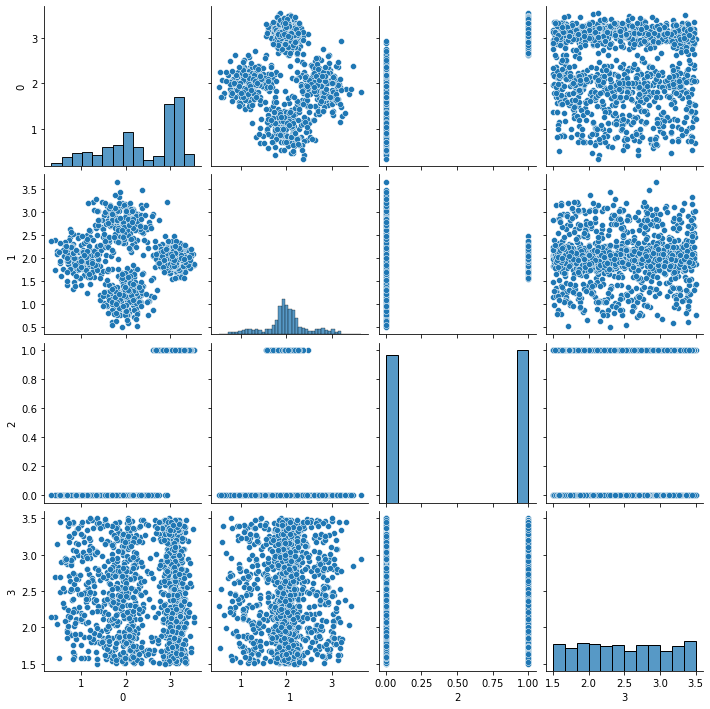

In [31]:
sns.pairplot(pd.DataFrame(X))

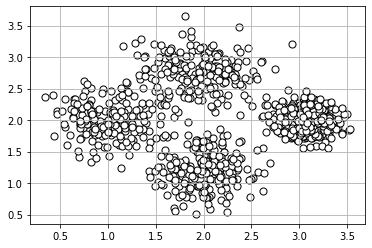

In [32]:
plt.scatter(X[:,focus[0]], X[:,focus[1]]
            , c='white'          # color filling the data markers
            , edgecolors='black' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=50)              # data marker size
plt.grid()  # plots a grid on the data
plt.show()

In [33]:
db = DBSCAN()
y_db = db.fit_predict(X)

In [34]:
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)
if cluster_labels_all[0] == -1:
    noise = True
    print("There is noise")
else:
    noise = False
print("There is/are {} cluster(s)".format(n_clusters-noise))

There is noise
There is/are 1 cluster(s)


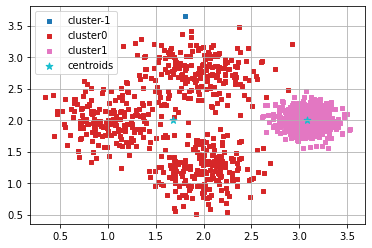

In [35]:
cluster_centers = np.empty((n_clusters,X.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(X[y_db==i,:], axis = 0)
plot_clusters(X,y_db,dim=(focus[0],focus[1]), points = cluster_centers)

In [36]:
param_grid = {'eps': list(np.arange(0.1, 0.4, 0.01)), 'min_samples': list(range(1,10,1))}
params = list(ParameterGrid(param_grid))
sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
# unc_thr = 33 # visualize results only for combinations with unclustered% below the threshold
unc_thr = 10 # visualize results only for combinations with unclustered% below the threshold

In [37]:
print("{:11}\t{:11}\t{:11}\t{:11}\t{:11}".\
      format('        eps','min_samples',' n_clusters',' silhouette', '    unclust%'))
for i in range(len(params)):
    db = DBSCAN(**(params[i]))
    y_db = db.fit_predict(X)
    cluster_labels_all = np.unique(y_db)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    n_clusters = len(cluster_labels)
    if n_clusters > 1:
        X_cl = X[y_db!=-1,:]
        y_db_cl = y_db[y_db!=-1]
        silhouette = silhouette_score(X_cl,y_db_cl)
        uncl_p = (1 - y_db_cl.shape[0]/y_db.shape[0]) * 100
        if silhouette > sil_thr and uncl_p < unc_thr:
            print("{:11.2f}\t{:11}\t{:11}\t{:11.2f}\t{:11.2f}%"\
                  .format(db.eps, db.min_samples, n_clusters, silhouette, uncl_p))

        eps	min_samples	 n_clusters	 silhouette	    unclust%
       0.19	          2	         57	       0.21	       9.00%
       0.20	          2	         44	       0.16	       7.58%
       0.21	          2	         33	       0.14	       6.08%
       0.21	          3	         19	       0.20	       8.42%
       0.22	          2	         26	       0.05	       4.92%
       0.22	          3	         12	       0.12	       7.25%
       0.23	          2	         22	       0.05	       3.75%
       0.23	          3	         10	       0.14	       5.75%
       0.23	          4	          5	       0.30	       9.17%
       0.24	          3	          7	       0.16	       4.75%
       0.24	          4	          5	       0.32	       7.00%
       0.25	          2	         13	       0.01	       2.58%
       0.25	          3	          6	       0.17	       3.75%
       0.25	          4	          4	       0.35	       6.25%
       0.25	          5	          3	       0.48	       9.00%
       0.26	          2	

In [38]:
# db = DBSCAN(eps=0.9, min_samples=4)    #  no
# db = DBSCAN(eps=0.28, min_samples=9) # no
db = DBSCAN(eps=0.1, min_samples=9)
# db = DBSCAN(eps=0.05, min_samples=9)
db = DBSCAN(eps=0.16, min_samples=9)
y_db = db.fit_predict(X)
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)

In [39]:
cluster_centers = np.empty((n_clusters,X.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(X[y_db==i,:], axis = 0)

In [40]:
print("There are {} clusters".format(n_clusters))

There are 1 clusters


In [41]:
print("The cluster labels are {}".format(cluster_labels))

The cluster labels are [0]


In [42]:
cluster_centers

array([[3.08707269, 1.9959027 , 1.        , 2.52020566]])

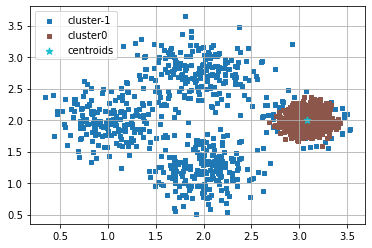

In [43]:
plot_clusters(X,y_db,dim=(focus[0],focus[1]), points = cluster_centers)

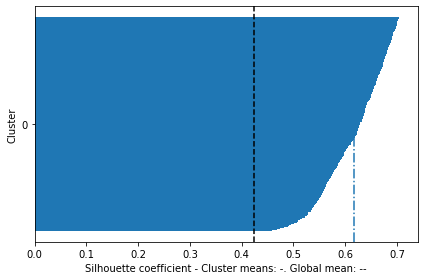

In [44]:
silhouette = silhouette_samples(X,y_db)
# from plot_silhouette import plot_silhouette  # python script provided separately
from plot_silhouette_w_mean import plot_silhouette  # python script provided separately
plot_silhouette(silhouette,y_db)

In [45]:
np.max(X, axis=0)-np.min(X,axis=0)

array([3.18675831, 3.13787553, 1.        , 1.99826296])

In [46]:
# from pyclustertend import hopkins
# from sklearn.preprocessing import scale, MinMaxScaler
# hopkins(X[:,[0,1]], 1500)
mms = MinMaxScaler()
Xs = mms.fit_transform(X)
# hopkins(Xs, 1500)

In [47]:
Xs.max(axis=0)-Xs.min(axis=0)

array([1., 1., 1., 1.])

In [48]:
data_file = 'exam_unsuperv.csv'
with open(data_file,'r') as f:
    with open("exam_unsuperv_updated.csv",'w') as f1:
        next(f) # skip header line
        for line in f:
            f1.write(line)

data_file_updated =  'exam_unsuperv_updated.csv'  
            
delimiter = ','            
X = np.loadtxt(data_file_updated, delimiter = delimiter)

In [49]:
y_db = db.fit_predict(X)
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)

In [50]:
cluster_centers = np.empty((n_clusters,X.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(X[y_db==i,:], axis = 0)

In [51]:
print("There are {} clusters".format(n_clusters))

There are 12 clusters


In [52]:
print("The cluster labels are {}".format(cluster_labels))

The cluster labels are [ 0  1  2  3  4  5  6  7  8  9 10 11]


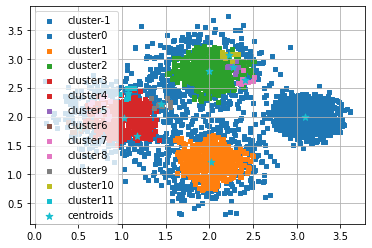

In [53]:
plot_clusters(X,y_db,dim=(focus[0],focus[1]), points = cluster_centers)

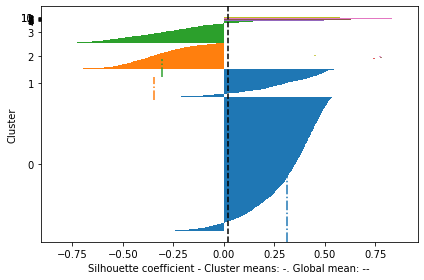

In [54]:
silhouette = silhouette_samples(X,y_db)
# from plot_silhouette import plot_silhouette  # python script provided separately
from plot_silhouette_w_mean import plot_silhouette  # python script provided separately
plot_silhouette(silhouette,y_db)